# Fashion MINIST


*   Dataset description: Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
*   Goal: classify grayscale Fashion-MNIST images to 10 classes



In [57]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
print(f"Tensorflow: {tf.__version__}\nKeras: {keras.__version__}")

Tensorflow: 2.12.0
Keras: 2.12.0


In [58]:
import matplotlib.pyplot as plt
import numpy as np

import random

# 1. Load data

In [59]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [60]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [61]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [62]:
X_train.dtype, y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [63]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [64]:
class_names[y_train[0]]
class_nums = len(class_names)

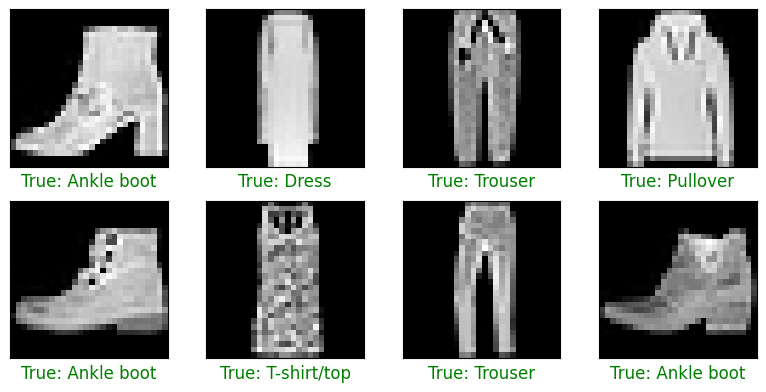

In [84]:
from typing import Optional
def plot_data(x_data: np.ndarray, y_data: np.ndarray, y_proba: Optional[np.ndarray]=None) -> None:
  nrows, ncols = 2, 4
  fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8,4))
  len_x = x_data.shape[0]
  for idx in range(nrows*ncols):
    ax = axes[idx // ncols, idx % ncols]
    img_idx = random.randint(0, len_x)

    ax.imshow(x_data[img_idx], cmap='gray')

    ax.set(xticks=[], yticks=[])
    color = 'green'
    true_label_str = f"True: {class_names[y_data[img_idx]]}"
    if y_proba is not None:
      predicted_idx = np.argmax(y_proba[img_idx])
      predicted_label = class_names[predicted_idx]
      color = 'red' if predicted_idx != y_data[img_idx] else color
      predicted_label_str = f"\nPredicted: {predicted_label}"

    img_title = true_label_str if y_proba is None else true_label_str + predicted_label_str

    ax.set_xlabel(img_title, color=color, fontsize=12)

  plt.tight_layout()
  plt.show()

plot_data(X_train, y_train)


# 2.Image Pre-processing


*   Reshaping it into the shape the model expects and scaling it so that all values are in the `[0, 1]` interval
*   Transform from `unit8` it into a `float32`





In [66]:
#Convert to float32 and scale images to the [0, 1] range for training
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

In [67]:
X_train.dtype, X_test.dtype

(dtype('float32'), dtype('float32'))

In [68]:
#Make sure images have shape (samples, heigth, width, channels)
X_train = np.expand_dims(X_train, axis = -1)
X_test = np.expand_dims(X_test, axis = -1)

In [69]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [70]:
#Convert class vectors to binary class matrices: 1 => [0 1 0 0 ...]
#1              => sparse_categorical_crossentropy
#[0 1 0 0 ...]  => categorical_crossentropy
y_train_label = keras.utils.to_categorical(y_train, class_nums)
y_test_label = keras.utils.to_categorical(y_test, class_nums)

In [71]:
y_train_label.shape, y_test_label.shape

((60000, 10), (10000, 10))

In [72]:
y_train[0], y_train_label[0]

(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

# 3. Network (ANN) Architecture

In [73]:
input_shape = (28,28, 1)

In [74]:
model = keras.models.Sequential([
    layers.Flatten(input_shape=input_shape), # (28,28,1) -> 1D array (784)
    layers.Dense(512, activation = 'relu'),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(class_nums, activation = 'softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [76]:
epochs = 10
batch_size = 128
history = model.fit(X_train, y_train_label,
          epochs=epochs,
          batch_size=batch_size,
          validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 7s 14ms/step - loss: 0.5608 - accuracy: 0.7983 - val_loss: 0.4780 - val_accuracy: 0.8142
Epoch 2/10
422/422 [==============================] - 6s 15ms/step - loss: 0.3856 - accuracy: 0.8579 - val_loss: 0.4098 - val_accuracy: 0.8500
Epoch 3/10
422/422 [==============================] - 6s 14ms/step - loss: 0.3381 - accuracy: 0.8742 - val_loss: 0.4411 - val_accuracy: 0.8405
Epoch 4/10
422/422 [==============================] - 6s 14ms/step - loss: 0.3111 - accuracy: 0.8826 - val_loss: 0.3508 - val_accuracy: 0.8680
Epoch 5/10
422/422 [==============================] - 5s 12ms/step - loss: 0.2886 - accuracy: 0.8931 - val_loss: 0.3367 - val_accuracy: 0.8800
Epoch 6/10
422/422 [==============================] - 6s 15ms/step - loss: 0.2728 - accuracy: 0.8982 - val_loss: 0.3324 - val_accuracy: 0.8777
Epoch 7/10
422/422 [==============================] - 6s 13ms/step - loss: 0.2604 - accuracy: 0.9008 - val_loss: 0.3234 - val_accuracy: 0.8877

In [77]:
history_dict = history.history

In [78]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [79]:
train_loss, val_loss = history_dict['loss'], history_dict['val_loss']
train_acc, val_acc = history_dict['accuracy'], history_dict['val_accuracy']

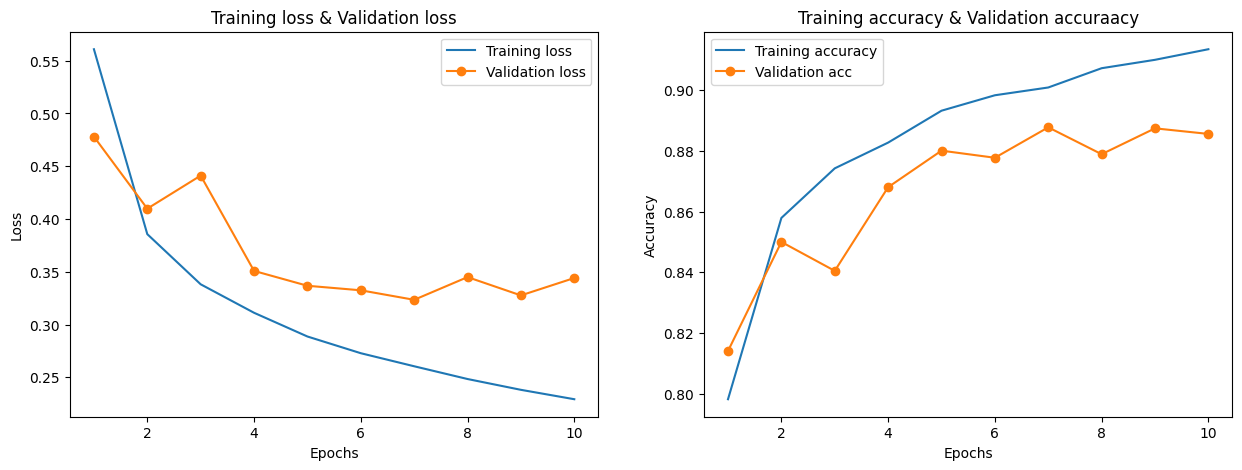

In [80]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,5))
epoch_runs = [i+1 for i in range(epochs)]
ax1.plot(epoch_runs, train_loss, label="Training loss")
ax1.plot(epoch_runs, val_loss, label="Validation loss", marker='o')
ax1.set(title="Training loss & Validation loss", xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epoch_runs, train_acc, label="Training accuracy")
ax2.plot(epoch_runs, val_acc, label="Validation acc", marker='o')
ax2.set(title="Training accuracy & Validation accuraacy", xlabel = "Epochs", ylabel = "Accuracy")
ax2.legend()

# 4. Model Evaluation

In [81]:
score = model.evaluate(X_test, y_test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.3656 - accuracy: 0.8787


In [83]:
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.3656051754951477
Test accuracy: 0.8787000179290771


# 5. Prediction

In [86]:
y_proba = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


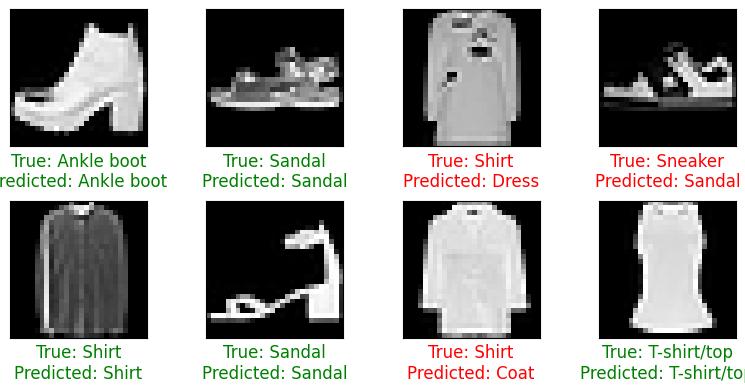

In [91]:
plot_data(X_test, y_test, y_proba)

In [88]:
from sklearn.metrics import classification_report

print(classification_report(y_test, np.argmax(y_proba, axis=1), target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.83      0.84      1000
     Trouser       1.00      0.96      0.98      1000
    Pullover       0.84      0.73      0.78      1000
       Dress       0.84      0.91      0.87      1000
        Coat       0.71      0.89      0.79      1000
      Sandal       0.95      0.98      0.97      1000
       Shirt       0.76      0.65      0.70      1000
     Sneaker       0.91      0.96      0.94      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.98      0.91      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

